## 10 Year Data

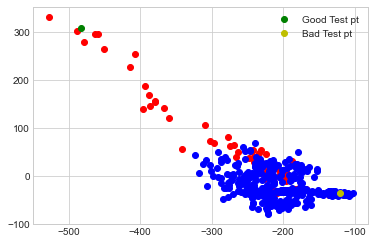

In [3]:
# import statements
import numpy as np
import pandas as pd
from scipy.linalg import diagsvd

# read file + put in dataframe (also display data in a nice visual way)
x = pd.read_csv('turnips-10years.csv', names=["DMP", "MAP", "MPP", "TuAP", "TuPP", "WAP", "WPP", "ThAP", "ThPP", "FAP", "FPP", "SAP", "SPP"])

# present data as an array/matrix
dmp = x["DMP"]
map = x["MAP"]
mpp = x["MPP"]
tuap = x["TuAP"]
tupp = x["TuPP"]
wap = x["WAP"]
wpp = x["WPP"]
thap = x["ThAP"]
thpp = x["ThPP"]
fap = x["FAP"]
fpp = x["FPP"]
sap = x["SAP"]
spp = x["SPP"]

data = np.array([dmp, map, mpp, tuap, tupp, wap, wpp, thap, thpp, fap, fpp, sap, spp])
data = data.T  # transpose so data appears correct 

# sift through and find good or bad weeks from data
g_dict = {}
b_dict = {}

hit = False
for i in range(500):
    for j in range(13):
        if data[i][j] >= 200:
            hit = True
    if hit == True:
        g_dict[i] = data[i]
    else:
        b_dict[i] = data[i]
    hit = False
    
# now remove prices after first 5 coordinates from the data so we only look at 
# Sunday, monday AM, monday PM, tuesday AM, and tuesday PM prices.
A = np.array([dmp, map, mpp, tuap, tupp])
A = A.T

# perform singular value decomposition
data = np.linalg.svd(A, full_matrices=True)
U = data[0]
S = data[1]
VT = data[2]

# A = USV^T
# AV = US(V^TV)
# AV = US
V = VT.T
AV = np.matmul(A, V)

US = U[:, :5] * S

# check to make sure AV = US
np.allclose(AV, US) 

# project data
P = np.array([[1, 0], [0, 1], [0, 0], [0, 0], [0, 0]])
PUS = np.matmul(US, P)

# get matrix VP
VP = np.matmul(V, P)

# multiply VP by some length-5 row input vector
gVPs = []
bVPs = []

# for good weeks
for key in g_dict:
    g = A[key]
    gVP = np.matmul(g, VP)
    gVPs.append(gVP)

# for bad weeks
for key in b_dict:
    b = A[key]
    bVP = np.matmul(b, VP)
    bVPs.append(bVP)
    
# plot data
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

xg = np.array([gVPs[i][0] for i in range(len(gVPs))])
yg = np.array([gVPs[i][1] for i in range(len(gVPs))])

xb = np.array([bVPs[i][0] for i in range(len(bVPs))])
yb = np.array([bVPs[i][1] for i in range(len(bVPs))])

# take the good point found from the "turnips-partialweek.csv" 
inputVector1 = np.array([104, 94, 139, 153, 520])
xgVP = np.matmul(inputVector1, VP)
xgVPx = xgVP[0]
xgVPy = xgVP[1]

# take a bad point found from the "turnips-partialweek.csv" 
inputVector2 = np.array([98, 49, 46, 42, 39])
xbVP = np.matmul(inputVector2, VP)
xbVPx = xbVP[0]
xbVPy = xbVP[1]

# Plotting
plt.scatter(xg, yg,color='r',marker='o')
plt.scatter(xb, yb,color='b',marker='o')
plt.plot(xgVPx, xgVPy,'go', label='Good Test pt')
plt.plot(xbVPx, xbVPy,'yo', label='Bad Test pt') 
plt.legend();
plt.show()

## 2000 Year Data

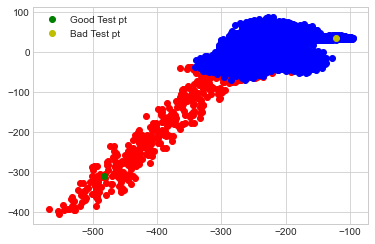

In [4]:
# read file + put in dataframe (also display data in a nice visual way)
x = pd.read_csv('turnips-2000years.csv', names=["DMP", "MAP", "MPP", "TuAP", "TuPP", "WAP", "WPP", "ThAP", "ThPP", "FAP", "FPP", "SAP", "SPP"])

# present data as an array/matrix
dmp = x["DMP"]
map = x["MAP"]
mpp = x["MPP"]
tuap = x["TuAP"]
tupp = x["TuPP"]
wap = x["WAP"]
wpp = x["WPP"]
thap = x["ThAP"]
thpp = x["ThPP"]
fap = x["FAP"]
fpp = x["FPP"]
sap = x["SAP"]
spp = x["SPP"]
data = np.array([dmp, map, mpp, tuap, tupp, wap, wpp, thap, thpp, fap, fpp, sap, spp])
data = data.T  # transpose so data appears correct 

# sift through and find good or bad weeks from data
g_dict = {}
b_dict = {}
hit = False
for i in range(10000):
    for j in range(13):
        if data[i][j] >= 200:
            hit = True
    if hit == True:
        g_dict[i] = data[i]
    else:
        b_dict[i] = data[i]
    hit = False     
    
# now remove prices after first 5 coordinates from the data so we only look at 
# Sunday, monday AM, monday PM, tuesday AM, and tuesday PM prices.
A = np.array([dmp, map, mpp, tuap, tupp])
A = A.T

# perform singular value decomposition
data = np.linalg.svd(A, full_matrices=True)
U = data[0]
S = data[1]
VT = data[2]

# get US
US = U[:, :5] * S

# project data
P = np.array([[1, 0], [0, 1], [0, 0], [0, 0], [0, 0]])
PUS = np.matmul(US, P)

# get matrix VP
V = VT.T
VP = np.matmul(V, P)
VP

# multiply VP by some length-5 row input vector
gVPs = []
bVPs = []
# for good weeks
for key in g_dict:
    g = A[key]
    gVP = np.matmul(g, VP)
    gVPs.append(gVP)
# for bad weeks
for key in b_dict:
    b = A[key]
    bVP = np.matmul(b, VP)
    bVPs.append(bVP)

# plot data
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

xg = np.array([gVPs[i][0] for i in range(len(gVPs))])
yg = np.array([gVPs[i][1] for i in range(len(gVPs))])

xb = np.array([bVPs[i][0] for i in range(len(bVPs))])
yb = np.array([bVPs[i][1] for i in range(len(bVPs))])

# take the good point found from the "turnips-partialweek.csv" 
inputVector1 = np.array([104, 94, 139, 153, 520])
xgVP = np.matmul(inputVector1, VP)
xgVPx = xgVP[0]
xgVPy = xgVP[1]

# take a bad point found from the "turnips-partialweek.csv" 
inputVector2 = np.array([98, 49, 46, 42, 39])
xbVP = np.matmul(inputVector2, VP)
xbVPx = xbVP[0]
xbVPy = xbVP[1]

# Plotting
plt.scatter(xg, yg,color='r',marker='o')
plt.scatter(xb, yb,color='b',marker='o')
plt.plot(xgVPx, xgVPy,'go', label='Good Test pt')
plt.plot(xbVPx, xbVPy,'yo', label='Bad Test pt') 
plt.legend();
plt.show()

## Partial Year Data

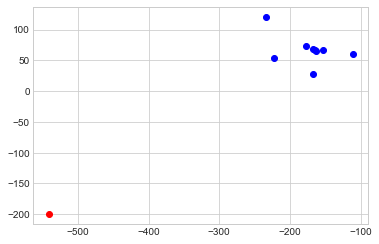

In [5]:
# read file + put in dataframe (also display data in a nice visual way)
x = pd.read_csv('turnips-partialweek.csv', names=["DMP", "MAP", "MPP", "TuAP", "TuPP"])

# present data as an array/matrix
dmp = x["DMP"]
map = x["MAP"]
mpp = x["MPP"]
tuap = x["TuAP"]
tupp = x["TuPP"]
A = np.array([dmp, map, mpp, tuap, tupp])
A = A.T  # transpose so data appears correct 

# sift through and find good or bad weeks from data
g_dict = {}
b_dict = {}
hit = False
for i in range(10):
    for j in range(5):
        if A[i][j] >= 200:
            hit = True
    if hit == True:
        g_dict[i] = A[i]
    else:
        b_dict[i] = A[i]
    hit = False     

# perform singular value decomposition
data = np.linalg.svd(A, full_matrices=True)
U = data[0]
S = data[1]
VT = data[2]

# get US
US = U[:, :5] * S

# project data
P = np.array([[1, 0], [0, 1], [0, 0], [0, 0], [0, 0]])
PUS = np.matmul(US, P)

# get matrix VP
V = VT.T
VP = np.matmul(V, P)
VP

# multiply VP by some length-5 row input vector
gVPs = []
bVPs = []
# for good weeks
for key in g_dict:
    g = A[key]
    gVP = np.matmul(g, VP)
    gVPs.append(gVP)
# for bad weeks
for key in b_dict:
    b = A[key]
    bVP = np.matmul(b, VP)
    bVPs.append(bVP)

# plot data
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

xg = np.array([gVPs[i][0] for i in range(len(gVPs))])
yg = np.array([gVPs[i][1] for i in range(len(gVPs))])

xb = np.array([bVPs[i][0] for i in range(len(bVPs))])
yb = np.array([bVPs[i][1] for i in range(len(bVPs))])

# Plotting
plt.scatter(xg, yg,color='r',marker='o')
plt.scatter(xb, yb,color='b',marker='o') 
plt.show()